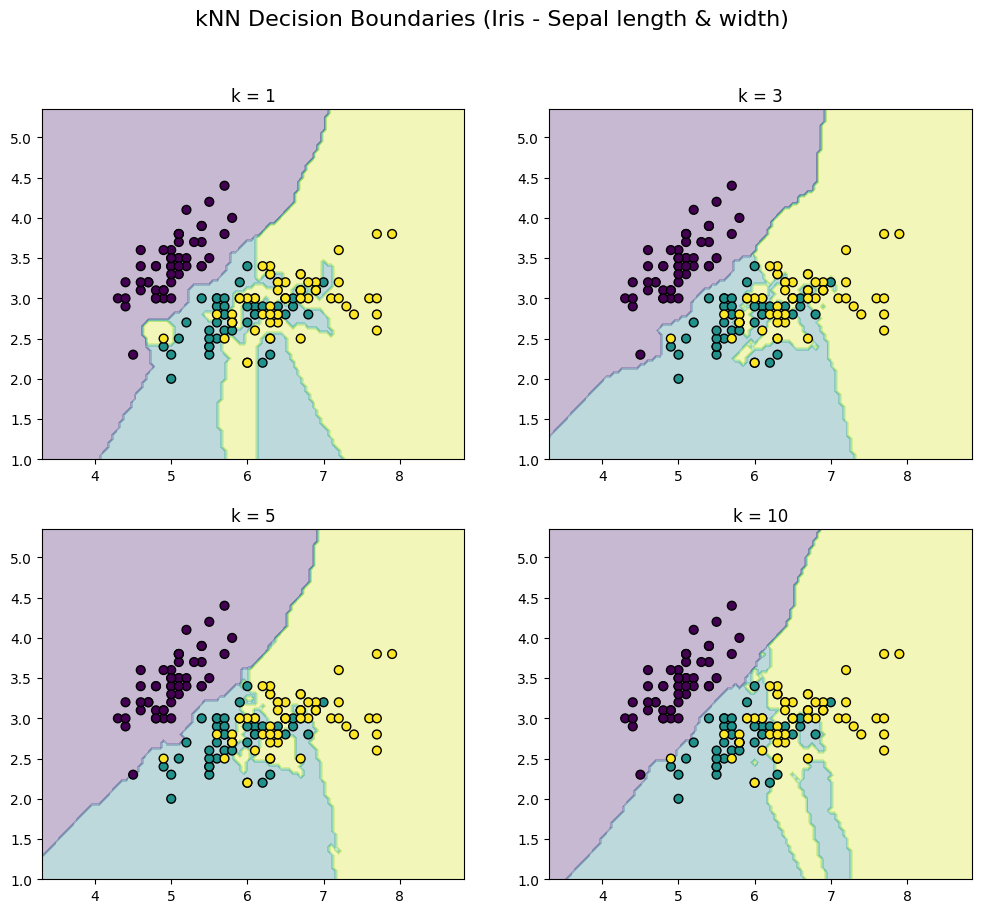

Observations on decision boundaries:
- With k=1: Very irregular boundaries (overfitting).
- With k=3 and k=5: Boundaries are smoother, better generalization.
- With k=10: Boundaries are very smooth, risk of underfitting.


In [1]:
# Q8. kNN Classification on Iris dataset
# --------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# 1. Load Iris dataset (only sepal length & sepal width)
iris = datasets.load_iris()
X = iris.data[:, :2]   # first two features: sepal length, sepal width
y = iris.target

# 2. Define k values
k_values = [1, 3, 5, 10]

# Create mesh for decision boundary plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# 3. Train models & plot decision boundaries
plt.figure(figsize=(12, 10))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Predict on mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=40)
    plt.title(f"k = {k}")

plt.suptitle("kNN Decision Boundaries (Iris - Sepal length & width)", fontsize=16)
plt.show()

# 4. Observations
print("Observations on decision boundaries:")
print("- With k=1: Very irregular boundaries (overfitting).")
print("- With k=3 and k=5: Boundaries are smoother, better generalization.")
print("- With k=10: Boundaries are very smooth, risk of underfitting.")
